<a href="https://colab.research.google.com/github/pietro-crc/Python_projects/blob/main/Google_Trends_and_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

 <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>

</ul>

In [3]:
df_tesla['TSLA_WEB_SEARCH'].describe()

count    124.000000
mean       8.725806
std        5.870332
min        2.000000
25%        3.750000
50%        8.000000
75%       12.000000
max       31.000000
Name: TSLA_WEB_SEARCH, dtype: float64

In [4]:
print(f"Largest value for Tesla in Web Search:{df_tesla['TSLA_WEB_SEARCH'].max()} ")
print(f"Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}")

Largest value for Tesla in Web Search:31 
Smallest value for Tesla in Web Search: 2


In [5]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


### Unemployment Data

In [6]:
df_unemployment


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [7]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search:{df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()} ')

Largest value for "Unemployemnt Benefits" in Web Search:100 


### Bitcoin

In [8]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [9]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [10]:
print(f'Missing values for Tesla?: {df_tesla.isna().sum().sum()}')
print(f'Missing values for U/E?:{df_unemployment.isna().sum().sum()} ')
print(f'Missing values for BTC Search?: {df_btc_search.isna().sum().sum()}')

Missing values for Tesla?: 0
Missing values for U/E?:0 
Missing values for BTC Search?: 0


In [11]:
print(f'Missing values for BTC price?:{df_btc_price.isna().sum().sum()} ')

Missing values for BTC price?:2 


In [12]:
print(f'Number of missing values: ')

Number of missing values: 


**Find the row with the NaN value and Remove any missing values found.**

In [13]:
df_btc_price[df_btc_price.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [14]:
df_btc_price= df_btc_price.dropna()

the row now is gone


In [15]:
df_btc_price[df_btc_price.isna().any(axis=1)]

,DATE,CLOSE,VOLUME


### Convert Strings to DateTime Objects

Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects,for all 4 DataFrames.

In [16]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [17]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [18]:
df_unemployment.MONTH= pd.to_datetime(df_unemployment.MONTH)
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6
...,...,...,...
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9


In [19]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [26]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [24]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [20]:
# Create locators for ticks on the time axis

In [21]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

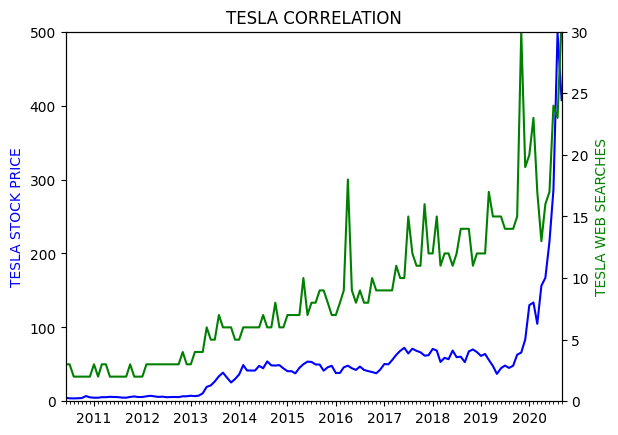

In [57]:
import matplotlib.dates as mdates

ax1 = plt.gca()
ax1.set_ylabel('TESLA STOCK PRICE',color='b')
ax2 = plt.twinx()
plt.title('TESLA CORRELATION')

years= mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(0,500)
ax2.set_ylim(0,30)
ax1.set_xlim(df_tesla.MONTH.min(),df_tesla.MONTH.max())

ax2.set_ylabel('TESLA WEB SEARCHES',color='g')

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,'b')

ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,'g')

plt.show()

In [ ]:
import matplotlib.dates as mdates

chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis.check [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>


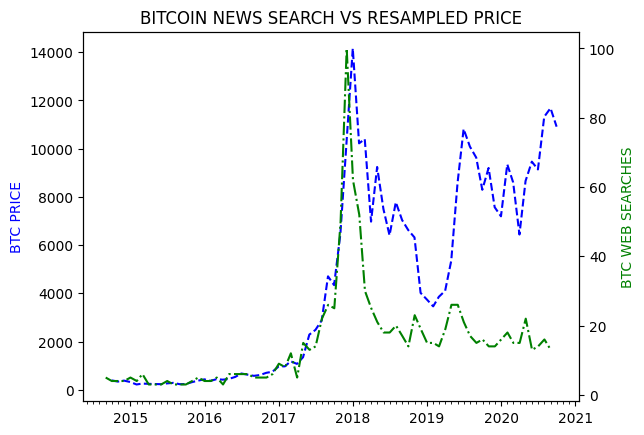

In [67]:
ax1 = plt.gca()
ax1.set_ylabel('BTC PRICE',color='b')
ax2 = plt.twinx()
plt.title('BITCOIN NEWS SEARCH VS RESAMPLED PRICE')

years= mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# ax1.set_ylim(0,500)
# ax2.set_ylim(0,30)
# ax1.set_xlim(df_tesla.MONTH.min(),df_tesla.MONTH.max())

ax2.set_ylabel('BTC WEB SEARCHES',color='g')

ax1.plot(df_btc_monthly.index,df_btc_monthly.CLOSE,'b',linestyle = '--')

ax2.plot(df_btc_search.MONTH,df_btc_search.BTC_NEWS_SEARCH,'g',linestyle= '-.')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>


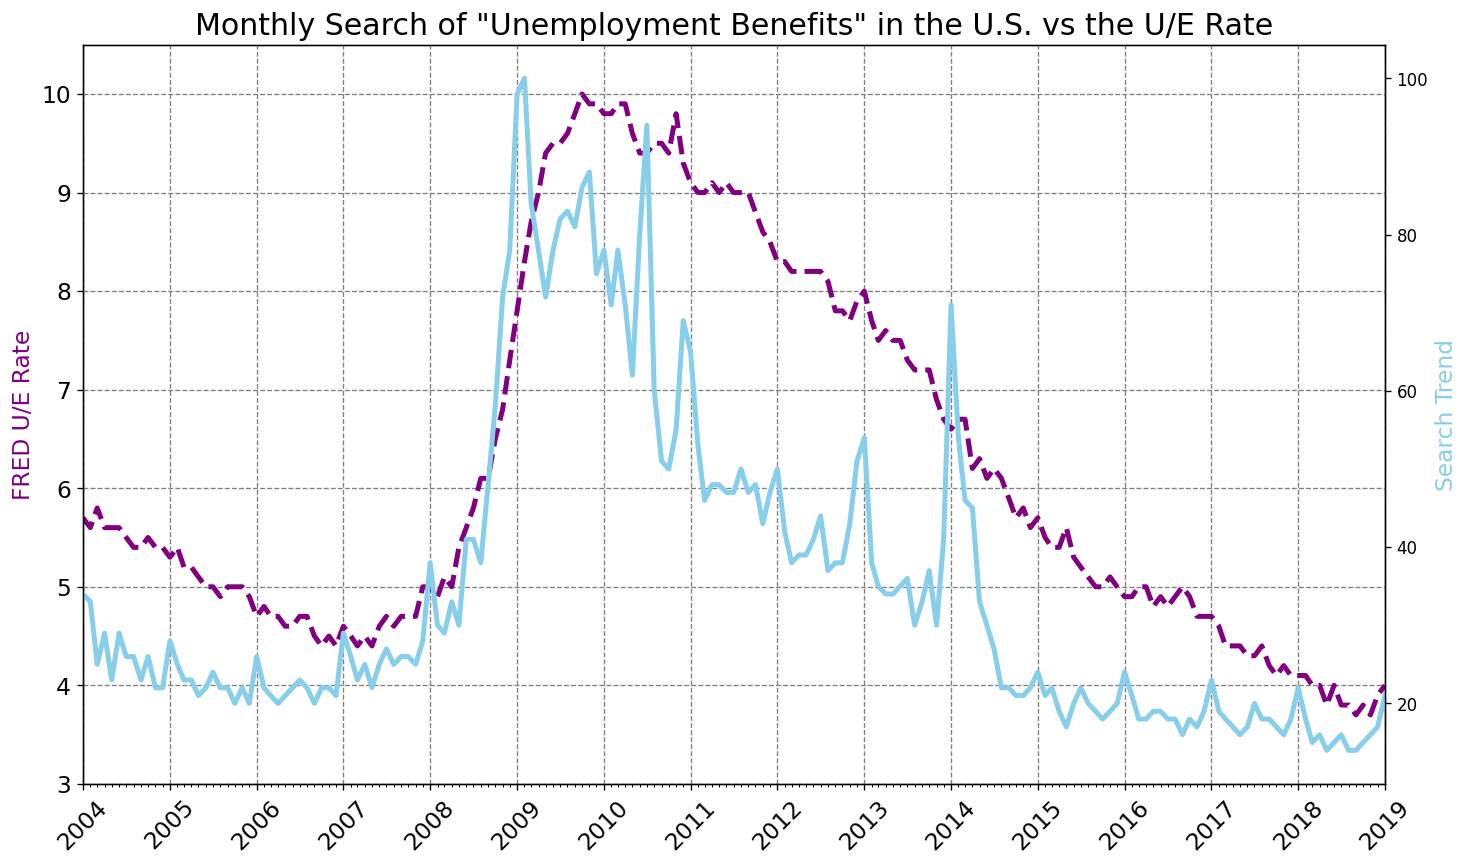

In [72]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

 Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment.


<ipython-input-73-d12a70104525>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['MONTH'], dtype='object')
  df_unemployment1 = df_unemployment.rolling(window=6).mean()


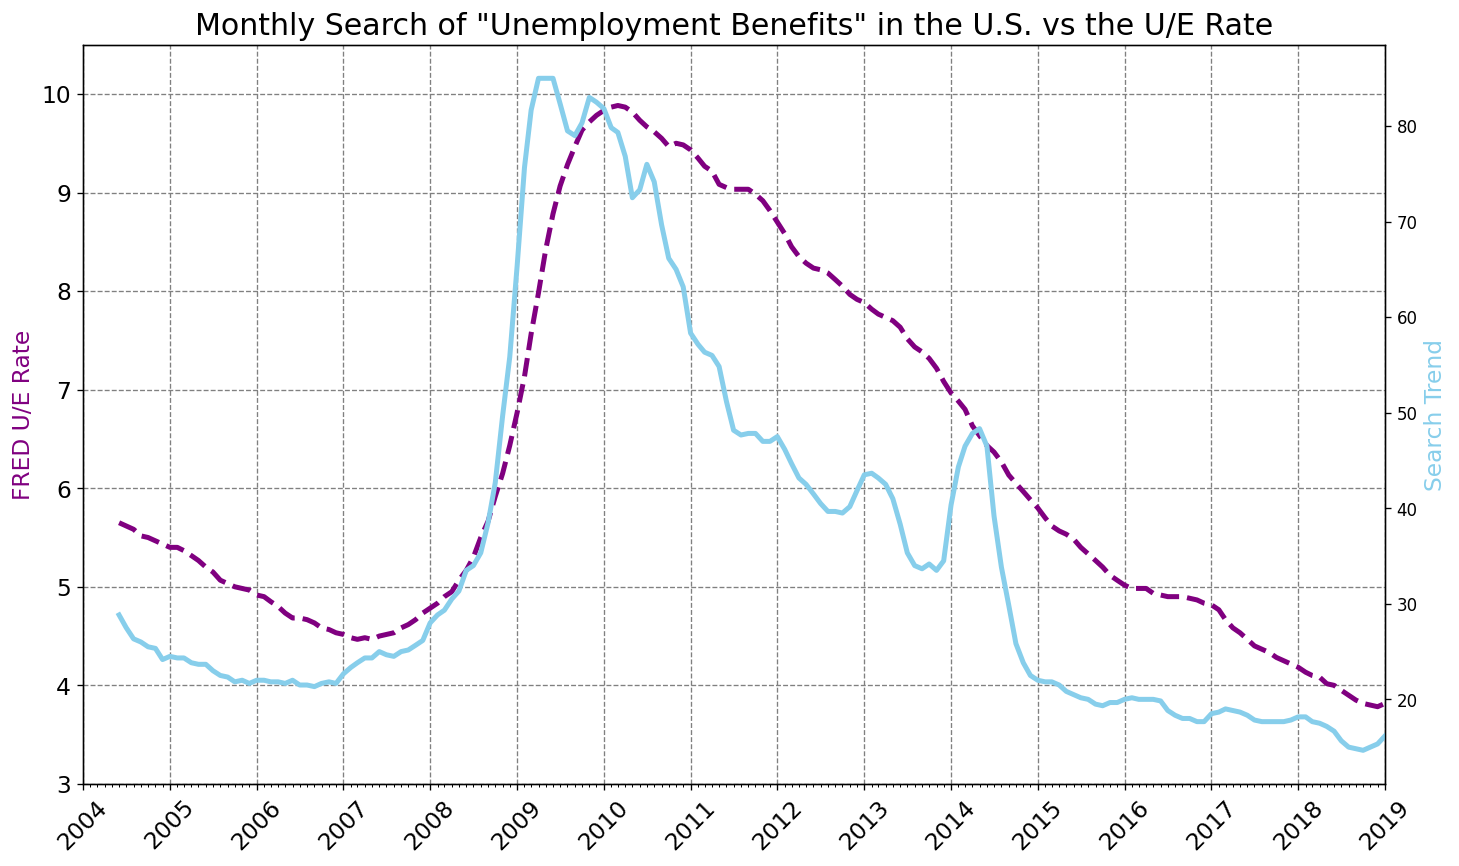

In [73]:
df_unemployment1 = df_unemployment.rolling(window=6).mean()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment1.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment1.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart.

In [74]:
df_20 = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-20.csv')
df_20

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [76]:
df_20.MONTH = pd.to_datetime(df_20.MONTH)
df_20

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


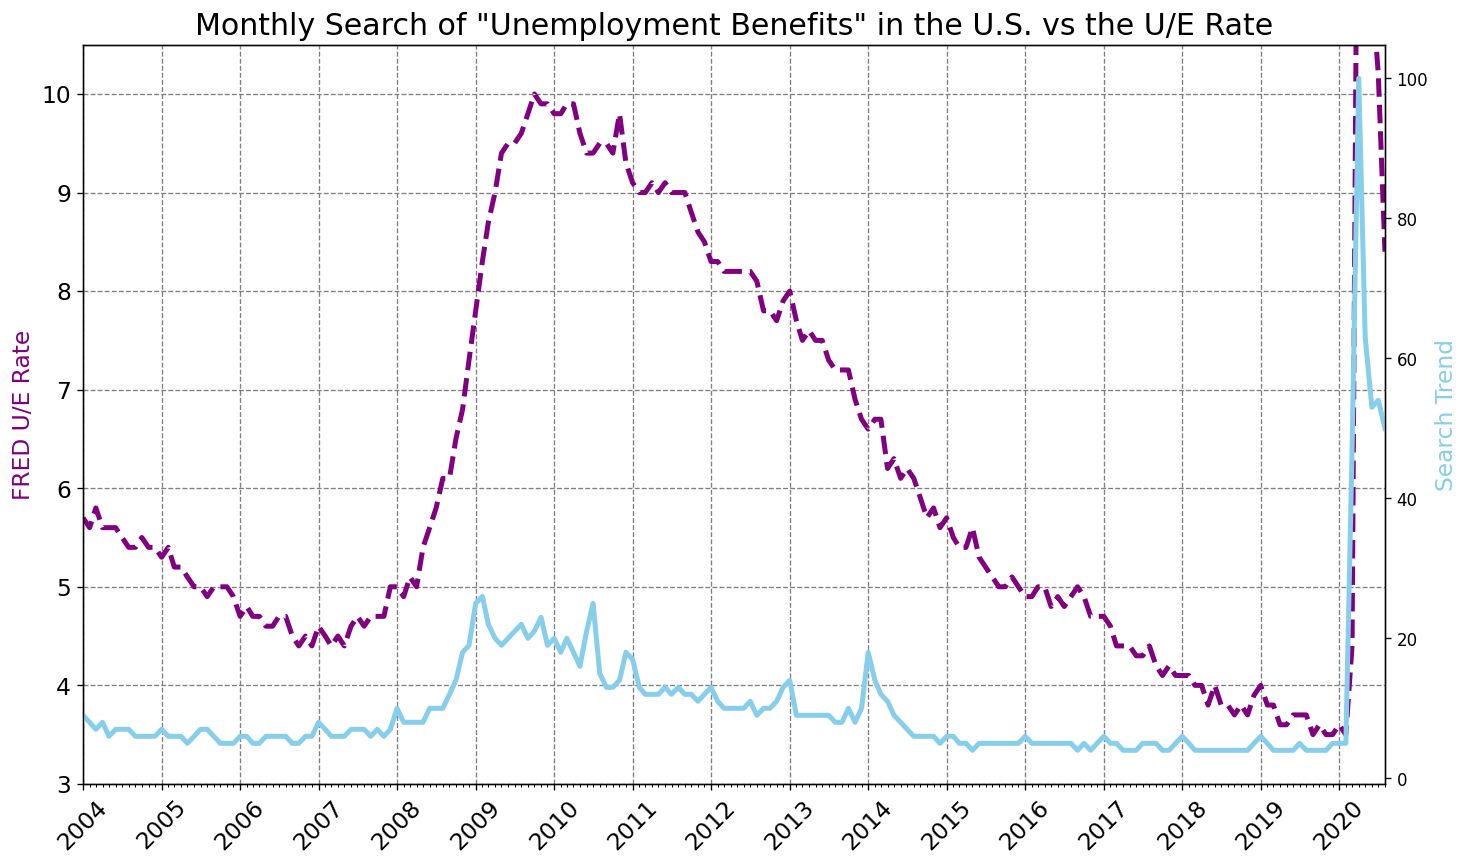

In [77]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_20.MONTH.min(), df_20.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_20.MONTH, df_20.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_20.MONTH, df_20.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()